In [14]:
# Regression Model
import pandas as pd
import seaborn as sns
import numpy as np

In [17]:
bottle = pd.read_csv('dataset/bottle.csv')	# Load the dataset

/var/folders/gl/k5pfnwvj4pq7kt4rhlf4llgc0000gn/T/ipykernel_15683/2725673027.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle = pd.read_csv('dataset/bottle.csv')	# Load the dataset


In [21]:
# Get columns that are going to be used
bottle = bottle[['Salnty', 'T_degC', 'Depthm', 'O2ml_L', 'STheta', 'O2Sat']]
# Drop rows with missing values (if any)
bottle.dropna(inplace=True)

In [19]:
bottle.head()


,Salnty,T_degC,Depthm,O2ml_L,STheta,O2Sat
0,33.440,10.50,0,NaN,25.649,NaN
1,33.440,10.46,8,NaN,25.656,NaN
2,33.437,10.46,10,NaN,25.654,NaN
3,33.420,10.45,19,NaN,25.643,NaN
4,33.421,10.45,20,NaN,25.643,NaN


<Axes: >

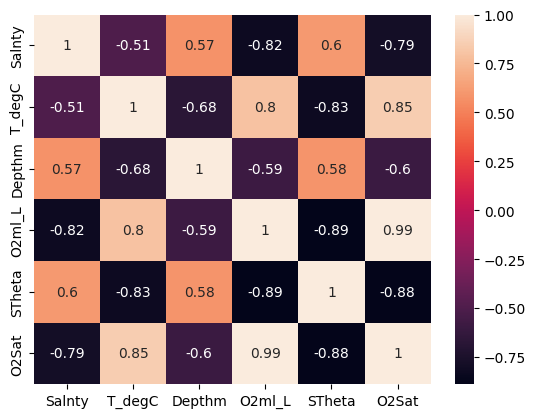

In [20]:
# Correlation Matrix
correlation = bottle.corr()
# Plotting the correlation matrix
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)



In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
X = bottle[['T_degC', 'Depthm', 'O2ml_L', 'STheta', 'O2Sat']]
y = bottle['Salnty']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Initialize the MLPRegressor with some basic parameters
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [27]:
# Predict on the test set
y_pred = mlp.predict(X_test)


In [28]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.0020871527561324692
R-squared: 0.9901250932771217
